<a href="https://colab.research.google.com/github/RimbaParamukti/Analyzing-Pakistan-Ecommerce/blob/main/Pakistan_Biggest_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

**READ DATA**

In [2]:
df = pd.read_csv('/content/Pakistan Biggest Ecommerce Analysis-Ready Dataset.csv',sep=',')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584524 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584524 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  int64  
 8   category_name_1        584524 non-null  object 
 9   sales_commission_code  584524 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

**Total Sales per Month**

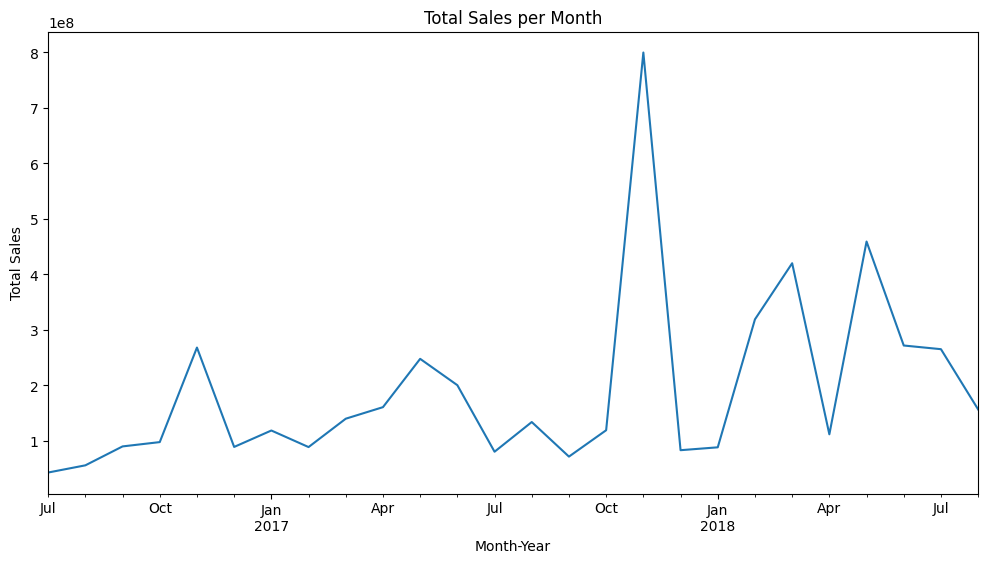

In [8]:
import matplotlib.pyplot as plt

# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%Y')

# Group by month and year, then sum the 'grand_total'
df['month_year'] = df['created_at'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['grand_total'].sum()

# Plotting
monthly_sales.plot(kind='line', figsize=(12, 6), title='Total Sales per Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()

**Top-Selling Products**

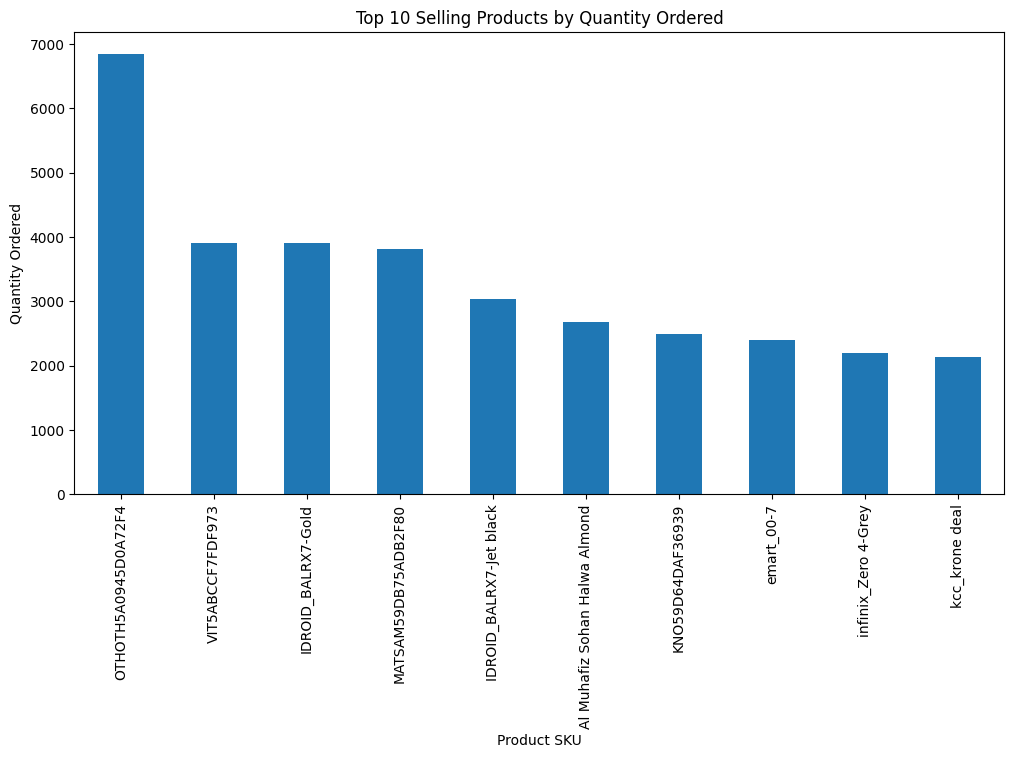

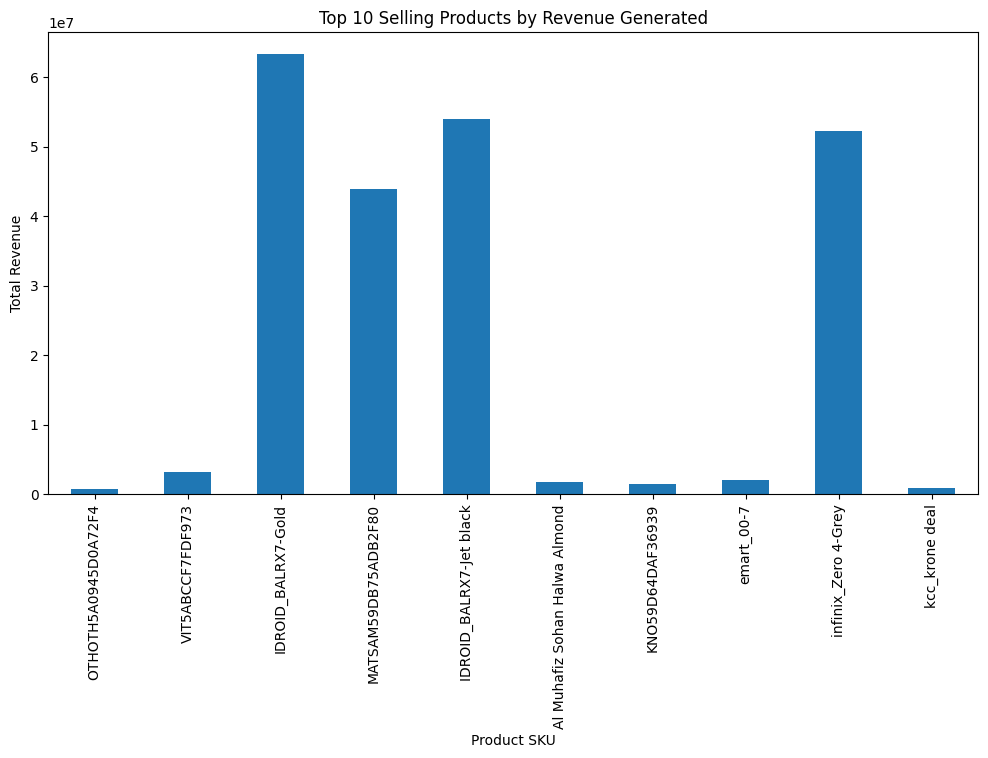

In [4]:
# Group by 'sku' and sum 'qty_ordered' and 'grand_total'
top_products = df.groupby('sku').agg({'qty_ordered': 'sum', 'grand_total': 'sum'}).sort_values(by='qty_ordered', ascending=False).head(10)

# Plotting
top_products['qty_ordered'].plot(kind='bar', figsize=(12, 6), title='Top 10 Selling Products by Quantity Ordered')
plt.xlabel('Product SKU')
plt.ylabel('Quantity Ordered')
plt.show()

top_products['grand_total'].plot(kind='bar', figsize=(12, 6), title='Top 10 Selling Products by Revenue Generated')
plt.xlabel('Product SKU')
plt.ylabel('Total Revenue')
plt.show()

**Top-Selling Category**

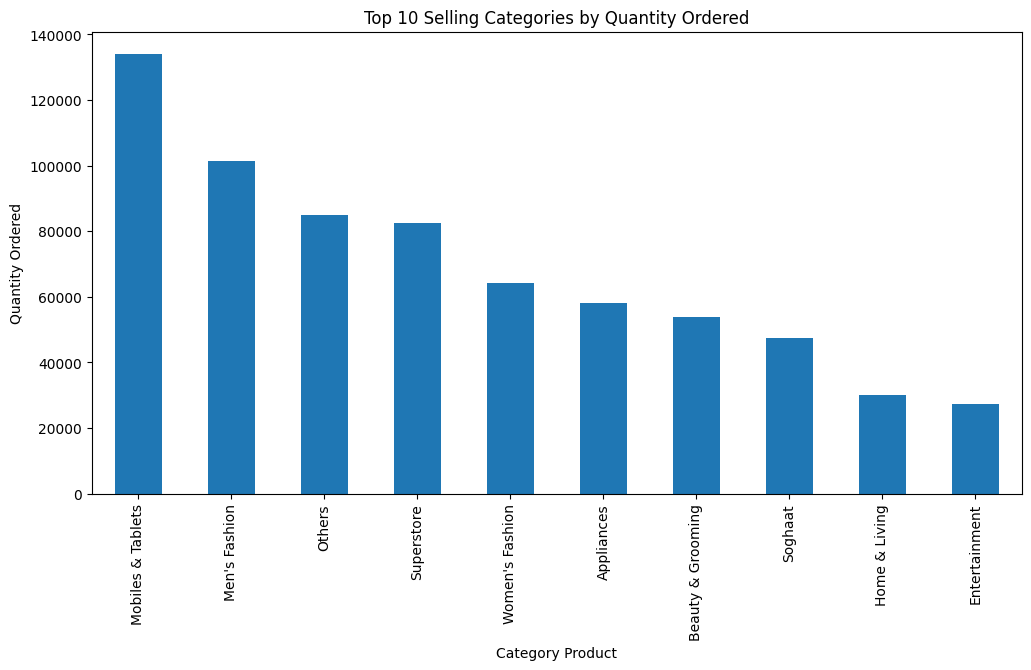

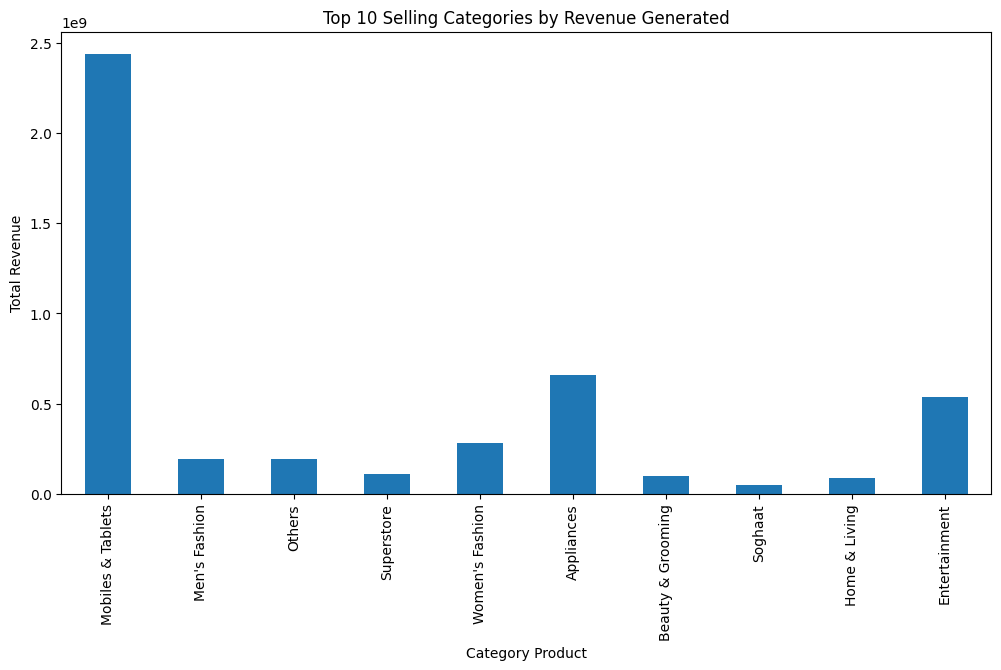

In [5]:
# Group by 'sku' and sum 'qty_ordered' and 'grand_total'
top_products = df.groupby('category_name_1').agg({'qty_ordered': 'sum', 'grand_total': 'sum'}).sort_values(by='qty_ordered', ascending=False).head(10)

# Plotting
top_products['qty_ordered'].plot(kind='bar', figsize=(12, 6), title='Top 10 Selling Categories by Quantity Ordered')
plt.xlabel('Category Product')
plt.ylabel('Quantity Ordered')
plt.show()

top_products['grand_total'].plot(kind='bar', figsize=(12, 6), title='Top 10 Selling Categories by Revenue Generated')
plt.xlabel('Category Product')
plt.ylabel('Total Revenue')
plt.show()

**Order Status Distribution**

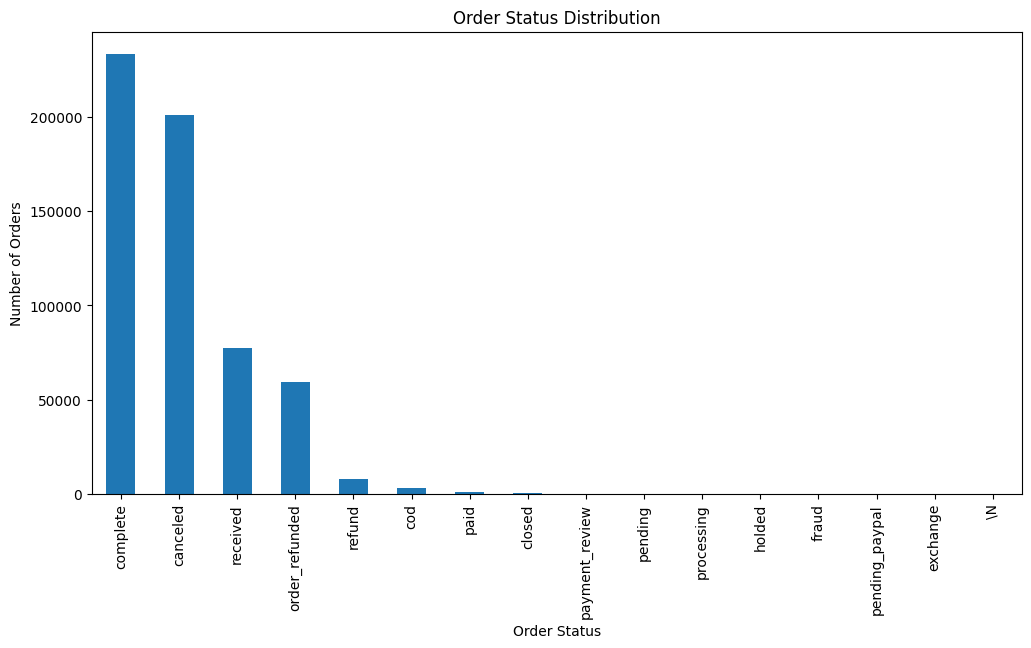

In [6]:
# Count the occurrences of each status
status_counts = df['status'].value_counts()

# Plotting
status_counts.plot(kind='bar', figsize=(12, 6), title='Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()